In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [43]:
data = pd.read_csv('Heart Disease data copy.csv')

* age
* sex
* chest pain type (4 values) -> cp
  *   Value 0: typical angina
  *   Value 1: atypical angina
  *   value 2: non-anginal pain
  *   value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg)
* chol: serum cholestoral in mg/dl
* (fbs) -> fasting blood sugar -> 120 mg/dl
  *   0: false
  *   1: true
* restecg -> resting electrocardiographic results (values 0,1,2)
  *   Value 0: normal
  *   Value 1: having ST-T
  *   value 2: showing probable or definite left ventricular
* thalach -> maximum heart rate achieved
* exang -> exercise induced angina (1 = yes, 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope -> the slope of the peak exercise ST segment
  *   Value 1: upsloping
  *   Value 2: flat
  *   value 3: downsloping
* ca -> number of major vessels (0-3) colored by flourosopy
* thal -> 3 = normal; 6 = fixed defect; 7 = reversable defect
* target -> 0 = less chance of heart attack, 1 = more chance of heart attack





In [45]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [46]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [47]:
data.shape

(1025, 14)

In [49]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [50]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [51]:
duplicate_rows = data[data.duplicated()]

In [52]:
# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2      

In [53]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()

In [55]:
# Verify removal of duplicates
print("Number of rows after removing duplicates:", data_cleaned.shape[0])
print("Number of cols after removing duplicates:", data_cleaned.shape[1])

Number of rows after removing duplicates: 302
Number of cols after removing duplicates: 14


In [14]:
data_cleaned.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

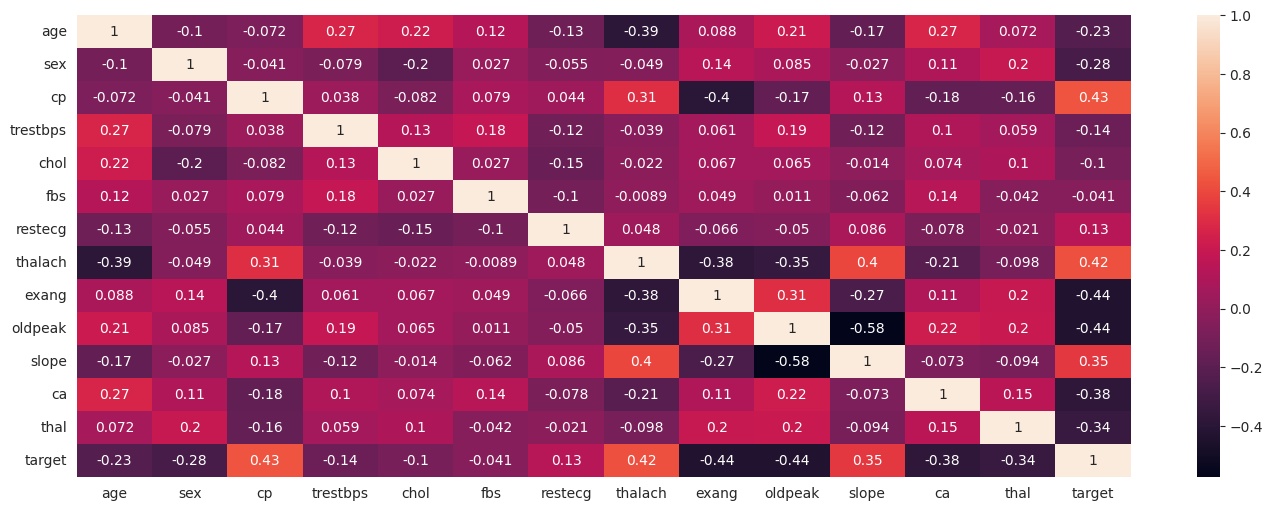

In [60]:
plt.figure(figsize = (17, 6))
sns.heatmap(data.corr(), annot = True)

In [61]:
data_cleaned['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [62]:
#Converting Numerical Data into Categorical Data

def heart_disease(row):
    if row == 0:
        return 'less chance'
    elif row == 1:
        return 'more chance'

In [65]:
#Applying converted data into our dataset with new column - Heart_Disease

data_cleaned['Heart_Disease']= data_cleaned['target'].apply(heart_disease)
data_cleaned.head()

<ipython-input-65-c422e17d36e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Heart_Disease']= data_cleaned['target'].apply(heart_disease)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,less chance
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,less chance
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,less chance
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,less chance
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,less chance


In [66]:
data_cleaned['Heart_Disease'].value_counts()

Heart_Disease
more chance    164
less chance    138
Name: count, dtype: int64

In [67]:
#Statistical Analysis

Min_Age = data_cleaned['age'].min()
Max_Age = data_cleaned['age'].max()
Mean_Age = data_cleaned['age'].mean()

print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.420529801324506


In [82]:
#Categorical Analysis

def age(row):
    if (row >= 29 and row < 40):
        return 'Young'
    elif (row >= 40 and row < 55):
        return 'Adult'
    elif (row >= 55):
        return 'Elder'


In [83]:
data_cleaned['Age1'] = data_cleaned['age'].apply(age)
data_cleaned.head()


<ipython-input-83-8dcd3fa4af3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Age1'] = data_cleaned['age'].apply(age)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,less chance,Male,Adult
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,less chance,Male,Adult
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,less chance,Male,Elder
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,less chance,Male,Elder
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,less chance,Female,Elder


In [85]:
data_cleaned['Age1'].value_counts()

Age1
Elder    159
Adult    128
Young     15
Name: count, dtype: int64

In [86]:
#Converting Numerical Data into Categorical Data

def gender(row):
    if row == 1:
        return 'Male'
    elif row == 0:
        return 'Female'

In [87]:
#Applying converted data into our dataset with new column - sex1

data_cleaned['sex1'] = data_cleaned['sex'].apply(gender)
data_cleaned.head()

<ipython-input-87-551244a6ea8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sex1'] = data_cleaned['sex'].apply(gender)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age1
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,less chance,Male,Adult
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,less chance,Male,Adult
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,less chance,Male,Elder
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,less chance,Male,Elder
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,less chance,Female,Elder


In [88]:
data_cleaned['cp'].value_counts()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64

In [89]:
def chest_pain(row):
    if row == 0:
      return 'typical angina'
    elif row == 1:
      return 'atypical angina'
    elif row == 2:
      return 'non-anginal pain'
    elif row == 3:
      return 'asymptomatic'


In [90]:
data_cleaned['Chest_Pain'] = data_cleaned['cp'].apply(chest_pain)
data_cleaned.head()

<ipython-input-90-988f3789d646>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Chest_Pain'] = data_cleaned['cp'].apply(chest_pain)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age1,Chest_Pain
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,less chance,Male,Adult,typical angina
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,less chance,Male,Adult,typical angina
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,less chance,Male,Elder,typical angina
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,less chance,Male,Elder,typical angina
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,less chance,Female,Elder,typical angina


In [91]:
data_cleaned['Chest_Pain'].value_counts()

Chest_Pain
typical angina      143
non-anginal pain     86
atypical angina      50
asymptomatic         23
Name: count, dtype: int64

In [92]:
data_cleaned['fbs'].value_counts()

fbs
0    257
1     45
Name: count, dtype: int64

In [93]:
def fb(row):
    if row == 0:
      return 'false'
    elif row == 1:
      return 'true'

In [94]:
data_cleaned['Fasting_Blood_Sugar'] = data_cleaned['fbs'].apply(fb)
data_cleaned.head()

<ipython-input-94-af4b48fb8279>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Fasting_Blood_Sugar'] = data_cleaned['fbs'].apply(fb)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age1,Chest_Pain,Fasting_Blood_Sugar
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,less chance,Male,Adult,typical angina,false
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,less chance,Male,Adult,typical angina,true
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,less chance,Male,Elder,typical angina,false
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,less chance,Male,Elder,typical angina,false
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,less chance,Female,Elder,typical angina,true


In [95]:
data_cleaned['Fasting_Blood_Sugar'].value_counts()

Fasting_Blood_Sugar
false    257
true      45
Name: count, dtype: int64

In [96]:
data_cleaned['exang'].value_counts()

exang
0    203
1     99
Name: count, dtype: int64

In [97]:
def ang(row):
  if row == 0:
    return 'No'
  elif row == 1:
    return 'yes'

In [98]:
data_cleaned['Ex_angina'] = data_cleaned['exang'].apply(ang)
data_cleaned.head()

<ipython-input-98-f7d280be087c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Ex_angina'] = data_cleaned['exang'].apply(ang)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age1,Chest_Pain,Fasting_Blood_Sugar,Ex_angina
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,less chance,Male,Adult,typical angina,false,No
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,less chance,Male,Adult,typical angina,true,yes
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,less chance,Male,Elder,typical angina,false,yes
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,less chance,Male,Elder,typical angina,false,No
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,less chance,Female,Elder,typical angina,true,No


In [99]:
data_cleaned['slope'].value_counts()

slope
2    141
1    140
0     21
Name: count, dtype: int64

In [107]:
def slope(row):
  if row == 0:
    return 'Downsloping'
  elif row == 1:
    return 'Flat'
  elif row == 2:
    return 'Upsloping'

In [109]:
data_cleaned['Slope1'] = data_cleaned['slope'].apply(slope)
data_cleaned.head()

<ipython-input-109-3099b0092afd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Slope1'] = data_cleaned['slope'].apply(slope)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,Heart_Disease,sex1,Age1,Chest_Pain,Fasting_Blood_Sugar,Ex_angina,Slope1,Thalenium
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,less chance,Male,Adult,typical angina,false,No,Upsloping,Reversible Effect
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,less chance,Male,Adult,typical angina,true,yes,Downsloping,Reversible Effect
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,less chance,Male,Elder,typical angina,false,yes,Downsloping,Reversible Effect
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,less chance,Male,Elder,typical angina,false,No,Upsloping,Reversible Effect
4,62,0,0,138,294,1,1,106,0,1.9,...,2,0,less chance,Female,Elder,typical angina,true,No,Flat,Not Described


In [104]:
data_cleaned['thal'].unique()

array([3, 2, 1, 0])

In [105]:
def thal(row):
  if row == 0:
    return 'Fixed Defect'
  elif row == 1:
    return 'Normal'
  elif row == 2:
    return 'Not Described'
  elif row == 3:
    return 'Reversible Effect'

In [106]:
data_cleaned['Thalenium'] = data_cleaned['thal'].apply(thal)
data_cleaned.head()

<ipython-input-106-65b87d7e2c8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Thalenium'] = data_cleaned['thal'].apply(thal)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,Heart_Disease,sex1,Age1,Chest_Pain,Fasting_Blood_Sugar,Ex_angina,Slope1,Thalenium
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,less chance,Male,Adult,typical angina,false,No,Downsloping,Reversible Effect
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,less chance,Male,Adult,typical angina,true,yes,Upsloping,Reversible Effect
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,less chance,Male,Elder,typical angina,false,yes,Upsloping,Reversible Effect
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,less chance,Male,Elder,typical angina,false,No,Downsloping,Reversible Effect
4,62,0,0,138,294,1,1,106,0,1.9,...,2,0,less chance,Female,Elder,typical angina,true,No,Flat,Not Described


In [110]:
data_cleaned['restecg'].value_counts()

restecg
1    151
0    147
2      4
Name: count, dtype: int64

In [111]:
def ecg(row):
  if row == 0:
    return 'normal'
  elif row == 1:
    return 'having ST-T wave abnormality'
  elif row == 2:
    return 'showing probable or definite left ventricular hypertrophy'

In [112]:
data_cleaned['Resting ECG'] = data_cleaned['restecg'].apply(ecg)
data_cleaned.head()

<ipython-input-112-5c15c5fb60b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Resting ECG'] = data_cleaned['restecg'].apply(ecg)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,Heart_Disease,sex1,Age1,Chest_Pain,Fasting_Blood_Sugar,Ex_angina,Slope1,Thalenium,Resting ECG
0,52,1,0,125,212,0,1,168,0,1.0,...,0,less chance,Male,Adult,typical angina,false,No,Upsloping,Reversible Effect,having ST-T wave abnormality
1,53,1,0,140,203,1,0,155,1,3.1,...,0,less chance,Male,Adult,typical angina,true,yes,Downsloping,Reversible Effect,normal
2,70,1,0,145,174,0,1,125,1,2.6,...,0,less chance,Male,Elder,typical angina,false,yes,Downsloping,Reversible Effect,having ST-T wave abnormality
3,61,1,0,148,203,0,1,161,0,0.0,...,0,less chance,Male,Elder,typical angina,false,No,Upsloping,Reversible Effect,having ST-T wave abnormality
4,62,0,0,138,294,1,1,106,0,1.9,...,0,less chance,Female,Elder,typical angina,true,No,Flat,Not Described,having ST-T wave abnormality


In [113]:
data_cleaned.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target'], inplace=True)

<ipython-input-113-8e379af21f57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target'], inplace=True)


In [114]:
data_cleaned.head()

,age,trestbps,chol,thalach,oldpeak,ca,Heart_Disease,sex1,Age1,Chest_Pain,Fasting_Blood_Sugar,Ex_angina,Slope1,Thalenium,Resting ECG
0,52,125,212,168,1.0,2,less chance,Male,Adult,typical angina,false,No,Upsloping,Reversible Effect,having ST-T wave abnormality
1,53,140,203,155,3.1,0,less chance,Male,Adult,typical angina,true,yes,Downsloping,Reversible Effect,normal
2,70,145,174,125,2.6,0,less chance,Male,Elder,typical angina,false,yes,Downsloping,Reversible Effect,having ST-T wave abnormality
3,61,148,203,161,0.0,1,less chance,Male,Elder,typical angina,false,No,Upsloping,Reversible Effect,having ST-T wave abnormality
4,62,138,294,106,1.9,3,less chance,Female,Elder,typical angina,true,No,Flat,Not Described,having ST-T wave abnormality


In [115]:
data_cleaned.shape

(302, 15)

In [117]:
data_cleaned.to_excel('cleaned_data.xlsx', index = False)